# MAT281 - Tarea 2

**Indicaciones**:

* En los **Ejercicio 1-8** puedes utilizar tanto `matplotlib` como `altair` según te parezca más conveniente o cómodo, en ambos casos cada gráfico debe tener elementos mínimos como:
    - Título
    - Nombre de los ejes, leyendas, etc. en formato _amigable_/_humano_, por ejemplo, si la columna del dataframe en cuestión tiene por nombre `casos_confirmados` se espera que el eje del gráfico tenga por nombre `Casos confirmados`.
    - Colores adecuados al tipo de datos.
    - Un tamaño adecuado para ver con facilidad en una pantalla con resolución HD o FullHD.
    - Cada vez que no se cumplan alguna de estos requerimientos se descontará __1 punto__ de la nota final.

* Para el **Ejercicio 9** es obligación utilizar `altair`.
* Cada ejercicio debe estar acompañado con una celda con comentarios o análisis que puedas desprender de los gráficos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import ipywidgets as widgets

from datetime import date
from ipywidgets import interactive, interact

pd.set_option('display.max_columns', 999)
alt.data_transformers.enable('data_server')
alt.themes.enable('opaque')

%matplotlib inline

**COVID-19 en Chile** 

En esta tarea exploraremos los datos de Covid-19 en Chile a profundidad. Las siguientes celdas cargarán los datos a utilizar en tu sesión. Es importante que leas la documentación de cada conjunto de datos para comprender las columnas.

In [2]:
start_date = pd.to_datetime("2020-04-13")

In [3]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto6
confirmados = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto6/bulk/data.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
    .dropna()
    .astype({"casos_confirmados": np.float, "tasa": np.float})
)

confirmados.head()

,poblacion,casos_confirmados,fecha,region_id,region,provincia_id,provincia,comuna_id,comuna,tasa
0,247552.0,270.0,2020-04-27,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,109.067994
1,247552.0,9138.0,2020-10-12,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,3691.345657
2,247552.0,596.0,2020-05-29,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,240.757497
3,247552.0,6131.0,2020-08-17,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,2476.651370
4,247552.0,353.0,2020-05-11,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,142.596303


In [4]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto19
activos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto19/CasosActivosPorComuna.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .loc[lambda x: x["codigo_comuna"].notnull()]
    .melt(id_vars=["region", "codigo_region", "comuna", "codigo_comuna", "poblacion"], var_name="fecha", value_name="casos_activos")
    .assign(fecha=lambda x: pd.to_datetime(x["fecha"]))
    .loc[lambda x: x["fecha"] >= start_date]
)

activos.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,fecha,casos_activos
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-04-13,88.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-04-13,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-04-13,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-04-13,0.0
4,Tarapaca,1,Alto Hospicio,1107.0,129999.0,2020-04-13,8.0


In [5]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto14
fallecidos = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["region"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos.head()

,region,fecha,fallecidos
374,Arica y Parinacota,2020-04-13,1.0
375,Tarapacá,2020-04-13,0.0
376,Antofagasta,2020-04-13,1.0
377,Atacama,2020-04-13,0.0
378,Coquimbo,2020-04-13,0.0


In [6]:
# https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto10
fallecidos_etareo = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .melt(id_vars=["grupo_de_edad"], var_name="fecha", value_name="fallecidos")
    .assign(
        fecha=lambda x: pd.to_datetime(x["fecha"]),
        grupo_de_edad=lambda x: x["grupo_de_edad"].str.replace("<=39", "0-39")
    )
    .loc[lambda x: x["fecha"] >= start_date]
)

fallecidos_etareo.head()

,grupo_de_edad,fecha,fallecidos
28,0-39,2020-04-13,3
29,40-49,2020-04-13,2
30,50-59,2020-04-13,3
31,60-69,2020-04-13,12
32,70-79,2020-04-13,29


## Ejercicio 1

(10 puntos)

Mostrar cantidad de fallecidos la fecha por cada grupo etáreo.

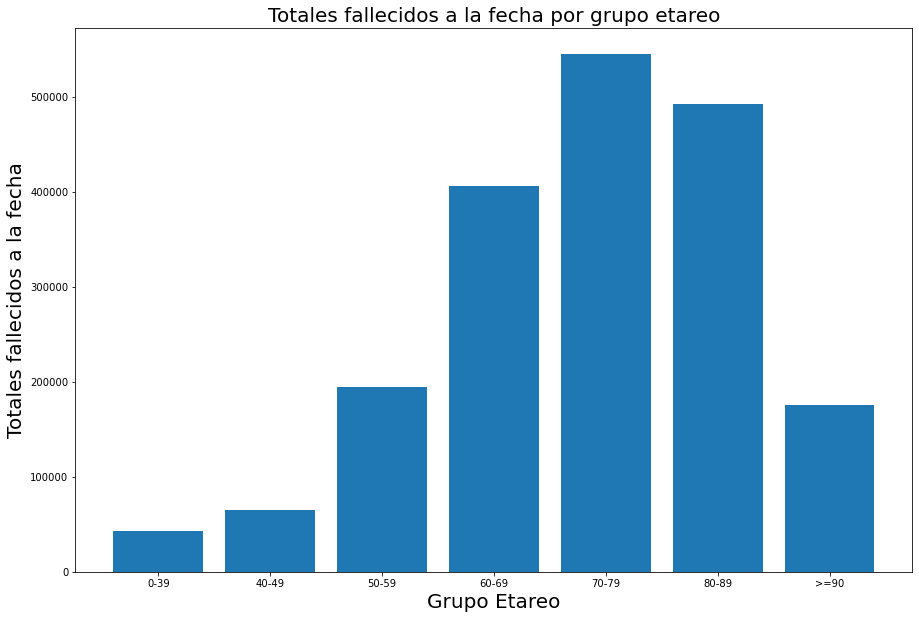

In [7]:
eta_dead=fallecidos_etareo.groupby("grupo_de_edad").sum()

plt.figure(figsize=(15, 10))
plt.bar(eta_dead.index, eta_dead["fallecidos"])
plt.xlabel("Grupo Etareo", fontsize=20)
plt.ylabel("Totales fallecidos a la fecha", fontsize=20)
plt.title("Totales fallecidos a la fecha por grupo etareo", fontsize=20)
plt.show()

**Comentarios:** Vemos una resiliencia comparativa por parte de los mas jovenes a morir por coronavirus, mientras una mayor mortalidad en la poblacion mas vieja (a exepcion del ultimo segmento, del cual hay pocos integrantes en un principio, por estar sobre la expectativa de vida, siendo aun asi la mortalidad bastante superior a poblaciones mas jovenes aun siendo mas pequenho en tamanho)

## Ejercicio 2

(10 puntos)

¿Qué tan variable es la población de las comunas de Chile? Considera utilizar un gráfico que resuma de buena forma la información sin agregar la variable de región o provincia.

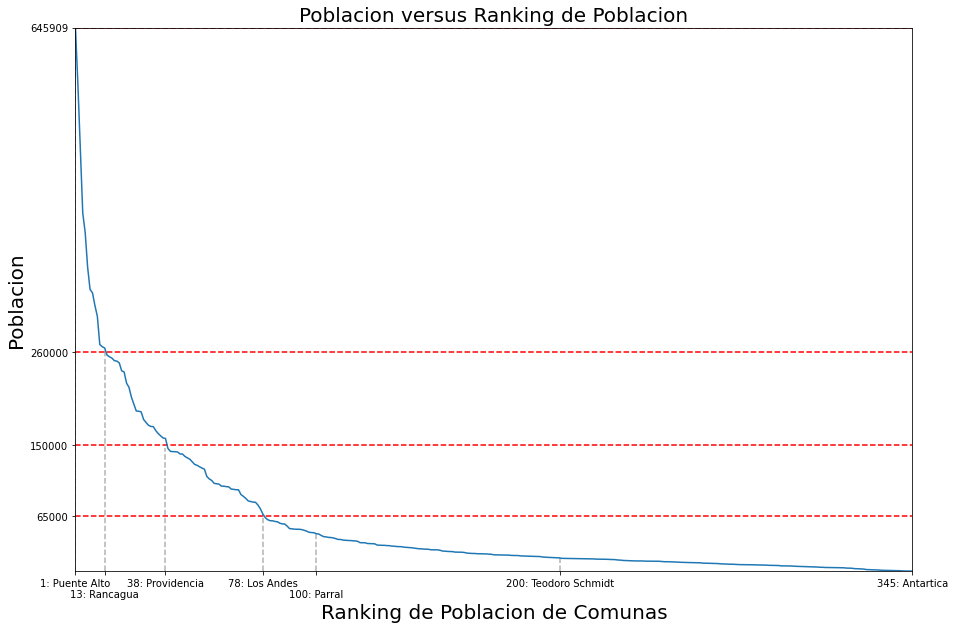

In [8]:
sorted=confirmados[["comuna", "poblacion"]][~confirmados["comuna"].duplicated()]
sorted.sort_values(by="poblacion", ascending=False, inplace=True)
sorted.reset_index(inplace=True)

plt.figure(figsize=(15, 10))
plt.plot(sorted.index+1, sorted["poblacion"])

plt.hlines(65000, 1, sorted.index[-1]+1, colors="r", linestyle="dashed")
plt.hlines(150000, 1, sorted.index[-1]+1, colors="r", linestyle="dashed")
plt.hlines(260000, 1, sorted.index[-1]+1, colors="r", linestyle="dashed")
plt.hlines(645909, 1, sorted.index[-1]+1, colors="r", linestyle="dashed")

plt.vlines(1, 0, 645909, colors="k", linestyle="dashed", alpha=0.3)
plt.vlines(13, 0, 265211, colors="k", linestyle="dashed", alpha=0.3)
plt.vlines(38, 0, 145906, colors="k", linestyle="dashed", alpha=0.3)
plt.vlines(78, 0, 68093, colors="k", linestyle="dashed", alpha=0.3)
plt.vlines(100, 0, 44544, colors="k", linestyle="dashed", alpha=0.3)
plt.vlines(200, 0, 15786, colors="k", linestyle="dashed", alpha=0.3)

plt.xticks([1, 13, 38, 78, 100, 200, 345], ["1: Puente Alto", "\n13: Rancagua", "38: Providencia", "78: Los Andes", "\n100: Parral", "200: Teodoro Schmidt", "345: Antartica"])
plt.yticks([65000, 150000, 260000, 645909])

plt.ylabel("Poblacion", fontsize=20)
plt.xlabel("Ranking de Poblacion de Comunas", fontsize=20)
plt.title("Poblacion versus Ranking de Poblacion", fontsize=20)

plt.margins(0, 0, tight=True)

plt.plot()
plt.show()

**Comentarios:** La curva de Poblacion es parecida a una exponencial, con alta variabilidad a partir de cierto punto, probablemente concentradas principalmente en zonas urbanas (por el sampling de comunas rankeadas)

## Ejercicio 3

(10 puntos)

Mostrar evolución y comparación de los fallecimientos entre distintos grupos etáreos, pero que al mismo tiempo sea fácil identificar la cantidad de fallecidos total en cada fecha.

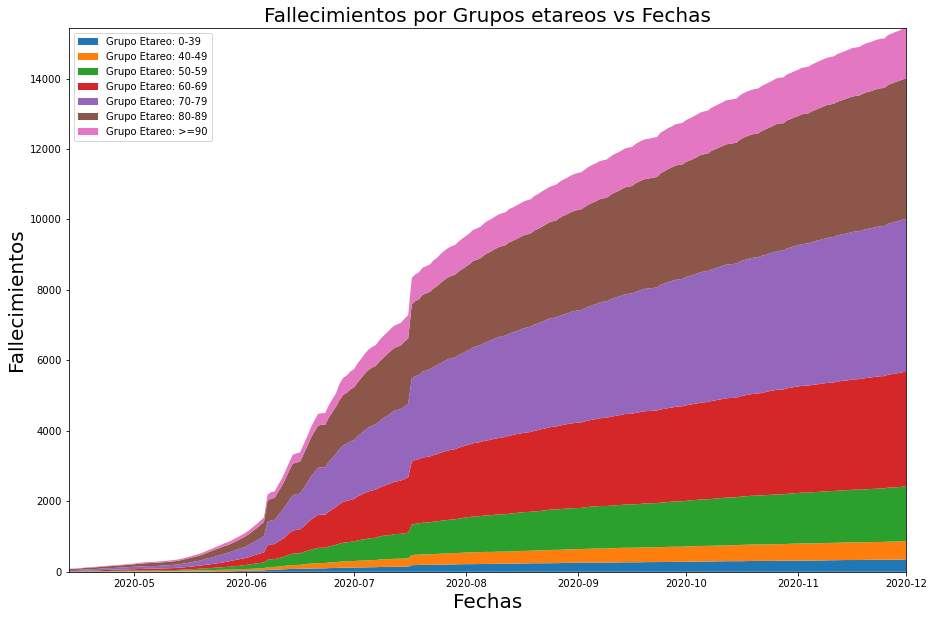

In [9]:
plt.figure(figsize=(15, 10))
x=fallecidos_etareo["fecha"][~fallecidos_etareo["fecha"].duplicated()].values

grp_eta=["0-39", "40-49", "50-59", "60-69", "70-79", "80-89", ">=90"]
y=[fallecidos_etareo.query("grupo_de_edad=="+"'"+i+"'")["fallecidos"].values for i in grp_eta]

plt.stackplot(x, y, labels=map(lambda x: "Grupo Etareo: "+x, grp_eta))


plt.xlabel("Fechas", fontsize=20)
plt.ylabel("Fallecimientos", fontsize=20)
plt.title("Fallecimientos por Grupos etareos vs Fechas", fontsize=20)

plt.legend(loc="upper left")

plt.margins(0, 0, tight=True)

plt.show()

**Comentarios:** Los Porcentajes entre segmentos se han mantenido bastante constantes en el tiempo, sin mayores variaciones; los fallecimientos han seguido una curva parecida a un logaritmo o raiz. Han habido pics considerables de mortalidad en determinados hitos (junio y mediados de julio).

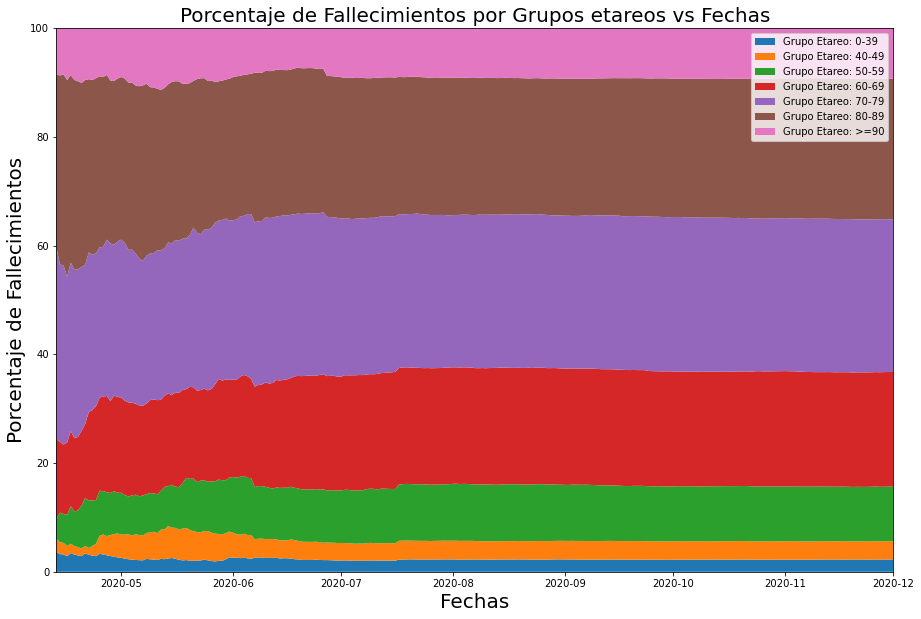

In [10]:
#yapa: El normalizado.
plt.figure(figsize=(15, 10))
x=fallecidos_etareo["fecha"][~fallecidos_etareo["fecha"].duplicated()].values

grp_eta=["0-39", "40-49", "50-59", "60-69", "70-79", "80-89", ">=90"]
y=np.array([fallecidos_etareo.query("grupo_de_edad=="+"'"+i+"'")["fallecidos"].values for i in grp_eta])
y=y/sum(y)

plt.stackplot(x, y*100, labels=map(lambda x: "Grupo Etareo: "+x, grp_eta))


plt.xlabel("Fechas", fontsize=20)
plt.ylabel("Porcentaje de Fallecimientos", fontsize=20)
plt.title("Porcentaje de Fallecimientos por Grupos etareos vs Fechas", fontsize=20)

plt.legend(loc="upper right")

plt.margins(0, 0, tight=True)

plt.show()

## Ejercicio 4

(10 puntos)

Mostrar en tres gráficos la evolución de casos confirmados, evolución de fallecimientos y evolución de casos activos.

Text(0, 0.5, 'Fallecimientos')

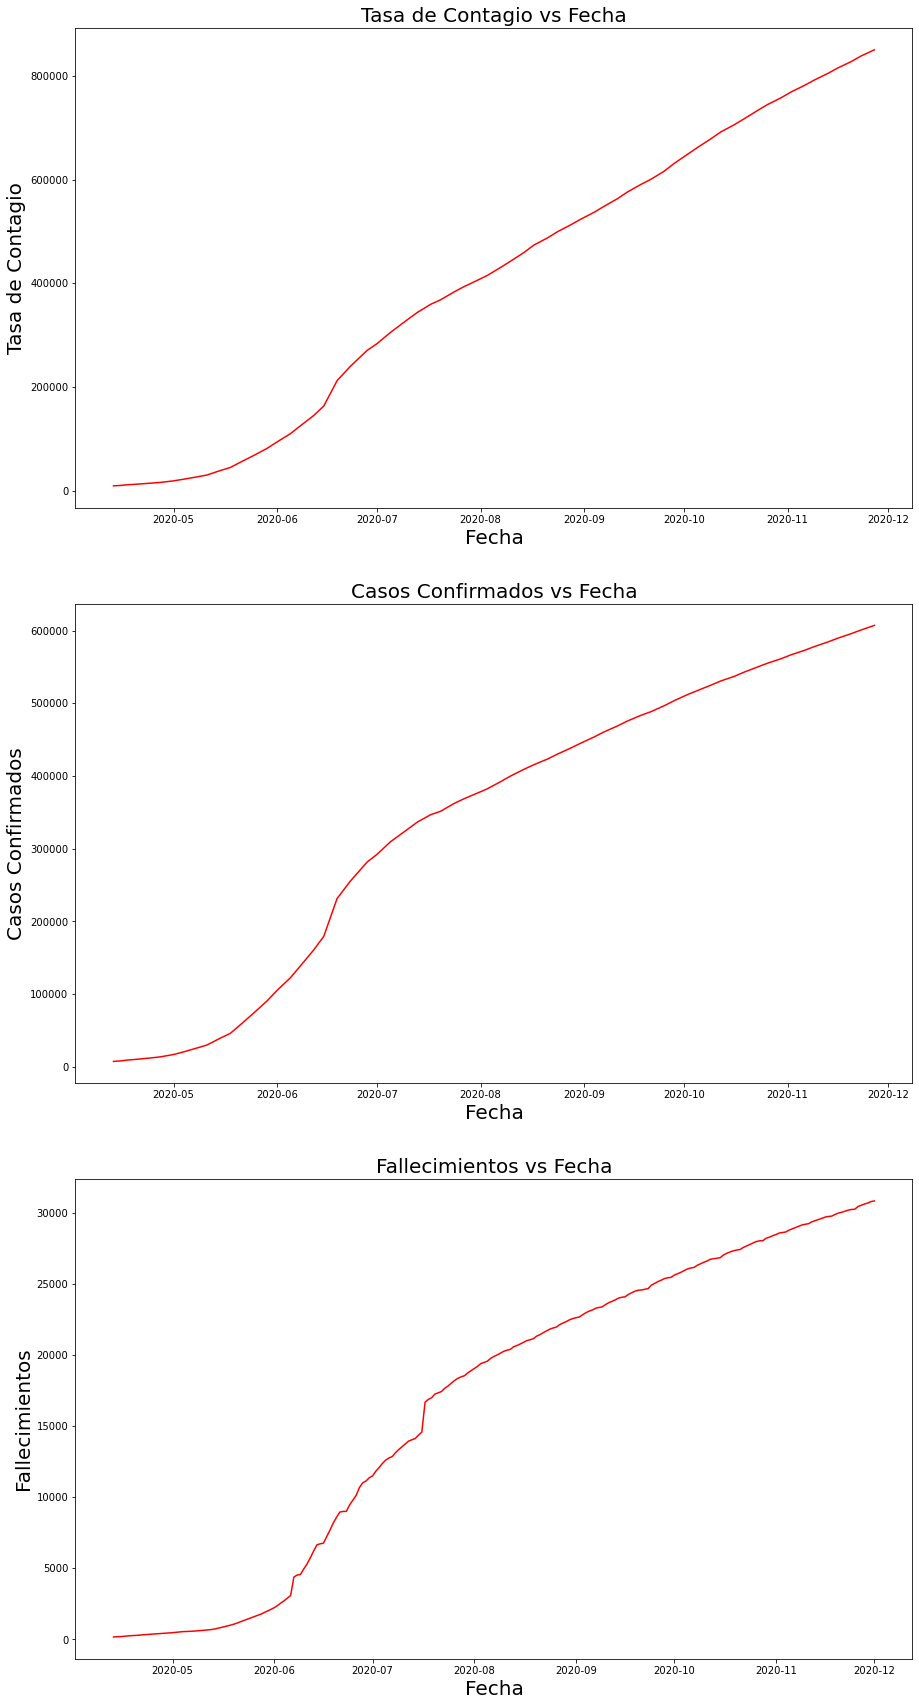

In [11]:
fig, (ax1, ax2, ax3)=plt.subplots(3, 1, figsize=(15, 30))

fecha_tasa=confirmados.groupby("fecha").sum()

ax1.plot(fecha_tasa.index, fecha_tasa["tasa"].values, "r-")
ax1.set_title("Tasa de Contagio vs Fecha", fontsize=20)
ax1.set_xlabel("Fecha", fontsize=20)
ax1.set_ylabel("Tasa de Contagio", fontsize=20)

ax2.plot(fecha_tasa.index, fecha_tasa["casos_confirmados"].values, "r-")
ax2.set_title("Casos Confirmados vs Fecha", fontsize=20)
ax2.set_xlabel("Fecha", fontsize=20)
ax2.set_ylabel("Casos Confirmados", fontsize=20)

fecha_muertos=fallecidos.groupby("fecha").sum()

ax3.plot(fecha_muertos.index, fecha_muertos.values, "r-")
ax3.set_title("Fallecimientos vs Fecha", fontsize=20)
ax3.set_xlabel("Fecha", fontsize=20)
ax3.set_ylabel("Fallecimientos", fontsize=20)

**Comentarios:** Hay una relacion entre la tasa de contagio y confirmados, mientras que la curva de fallecimientos "sigue" a la curva de confirmados.

## Ejercicio 5

(10 puntos)

Comparar la tasa de incidencia entre las regiones a lo largo del tiempo.

In [12]:
import random as rnd
from time import time
class RandStack:
    def __init__(self, iterable):
        rnd.seed(time())
        self.stack=list(iterable)
    def pull(self):
        pulled=self.stack[rnd.randrange(0, len(self.stack))]
        self.stack.remove(pulled)
        return pulled

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

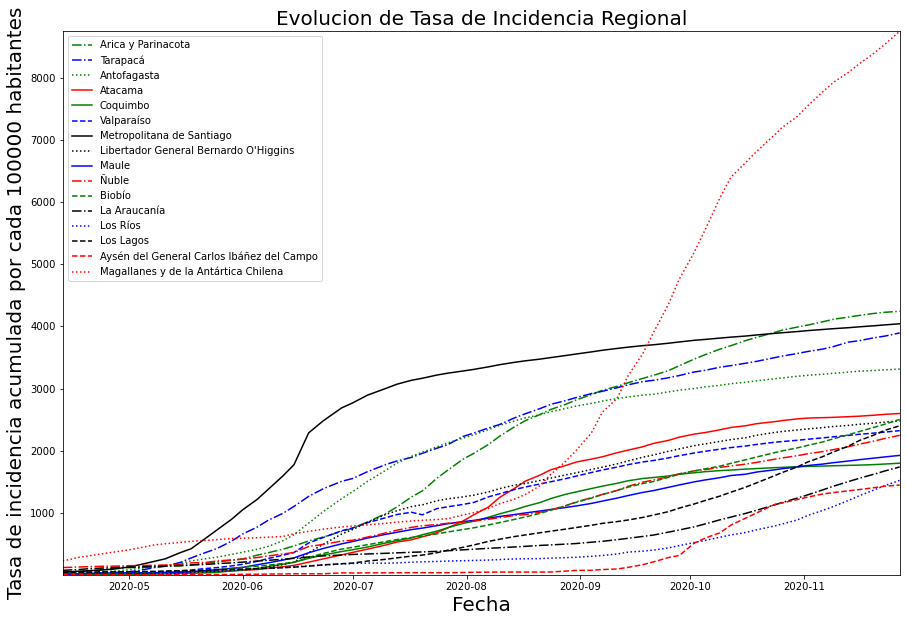

In [59]:
color=[i+j for i in ["r", "g", "b", "k"] for j in ["-", "--", ":", "-."]]
colors=RandStack(color)

fecha_tasa_region=confirmados.groupby(["region", "fecha"]).sum()

plt.figure(figsize=(15, 10))

#Asumiendo que es tasa de incidencia acumulada por cada 100000, datos extraidos del informe del minsal del 7/11
for i in confirmados["region"].unique():
    plt.plot(fecha_tasa_region.xs(i).index, fecha_tasa_region.xs(i)["casos_confirmados"].values/fecha_tasa_region.xs(i)["poblacion"].values*100000, colors.pull(), label=i)

plt.title("Evolucion de Tasa de Incidencia Regional", fontsize=20)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Tasa de incidencia acumulada por cada 100000 habitantes", fontsize=20)

plt.margins(0, 0)

plt.legend()
plt.show()

**Comentarios:** Vemos un incremento constante en la tasa de Incidencias a lo largo del tiempo hasta noviembre, mientras que hay un pic considerable en al region de Magallanes.

## Ejercicio 6

(10 puntos)

¿Hay alguna conclusión que puedas obtener rápidamente al graficar un _scatter plot_ con los casos confirmados y tasa de incidencia de cada comuna para los días 13 de abril y 6 de noviembre del 2020? Además, colorea cada punto según la región a la que pertenece y considera si es útil en el gráfico que el tamaño sea proporcional a la población.

In [49]:
display(confirmados[:1])

,poblacion,casos_confirmados,fecha,region_id,region,provincia_id,provincia,comuna_id,comuna,tasa
0,247552.0,270.0,2020-04-27,15.0,Arica y Parinacota,151.0,Arica,15101.0,Arica,109.067994


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

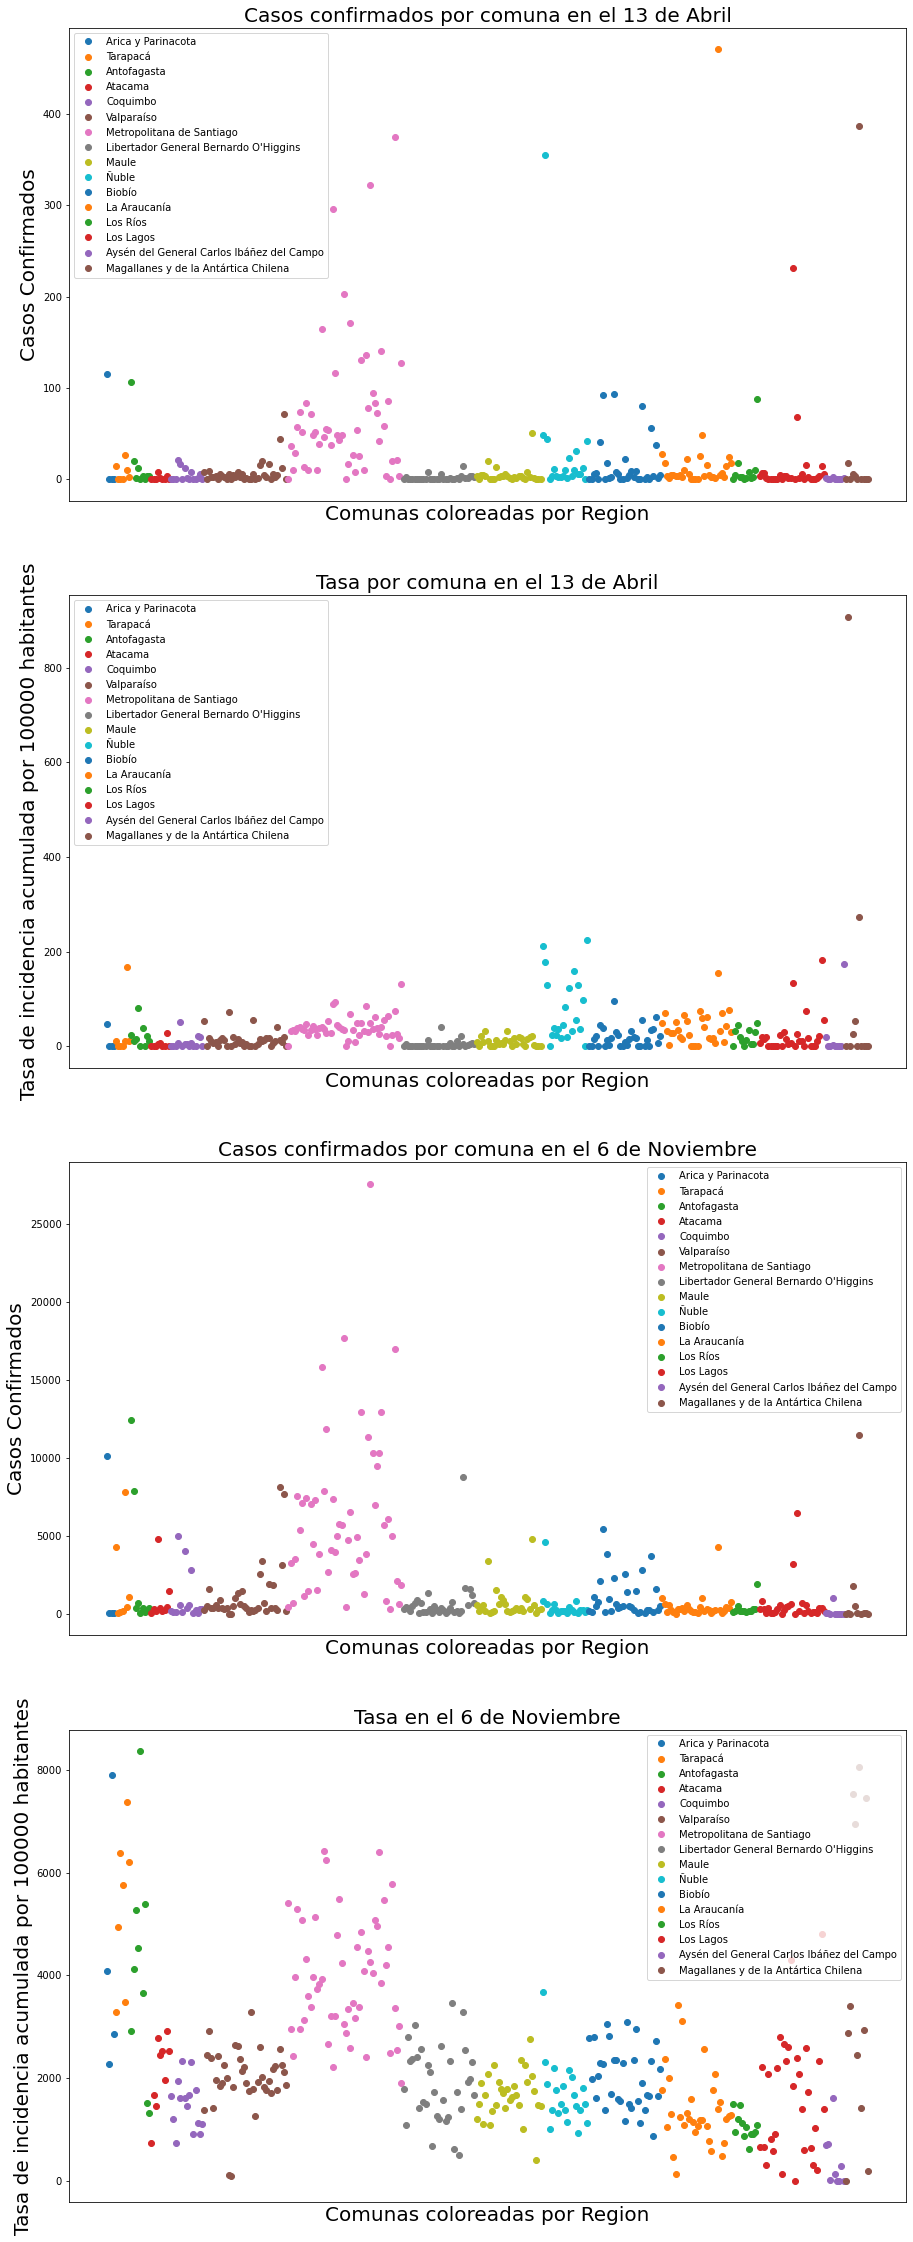

In [56]:
fig, (ax1, ax2, ax3, ax4)=plt.subplots(4, 1, figsize=(15, 40))

regiones=list(confirmados["region"].unique())

april=confirmados.query('fecha=="2020-04-13"')
november=confirmados.query('fecha=="2020-11-06"')

for i in regiones:
    partial_dt=april.query('region=='+'"'+i+'"')
    ax1.plot(partial_dt["comuna"], partial_dt["casos_confirmados"], "o", label=i)
    ax2.plot(partial_dt["comuna"], partial_dt["tasa"], "o", label=i)
    
for i in regiones:
    partial_dt=november.query('region=='+'"'+i+'"')
    ax3.plot(partial_dt["comuna"], partial_dt["casos_confirmados"], "o", label=i)
    ax4.plot(partial_dt["comuna"], partial_dt["tasa"], "o", label=i)

ax1.set_title("Casos confirmados por comuna en el 13 de Abril", fontsize=20)
ax2.set_title("Tasa por comuna en el 13 de Abril", fontsize=20)
ax3.set_title("Casos confirmados por comuna en el 6 de Noviembre", fontsize=20)
ax4.set_title("Tasa en el 6 de Noviembre", fontsize=20)    

ax1.set_xlabel("Comunas coloreadas por Region", fontsize=20)
ax2.set_xlabel("Comunas coloreadas por Region", fontsize=20)
ax3.set_xlabel("Comunas coloreadas por Region", fontsize=20)
ax4.set_xlabel("Comunas coloreadas por Region", fontsize=20)

ax1.set_ylabel("Casos Confirmados", fontsize=20)
ax2.set_ylabel("Tasa de incidencia acumulada por 100000 habitantes", fontsize=20)
ax3.set_ylabel("Casos Confirmados", fontsize=20)
ax4.set_ylabel("Tasa de incidencia acumulada por 100000 habitantes", fontsize=20)

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])
ax4.set_xticks([])


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

**Comentarios:** Vemos que los casos nuevos normalizados por poblacion (tasa) nos es mas util para determinar los contagios reales por region, pues de otra forma estos quedan fuertemente obfuscados por las regiones con mas poblacion, como la metropolitana.

## Ejercicio 7

(10 puntos)

1. Grafica la evolución de los casos activos de cada comuna en un solo gráfico. 
2. Grafica la evolución de los casos activos de cada comuna en gráficos separados por región.

Entrega los pros y contras de cada uno de estos enfoques.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

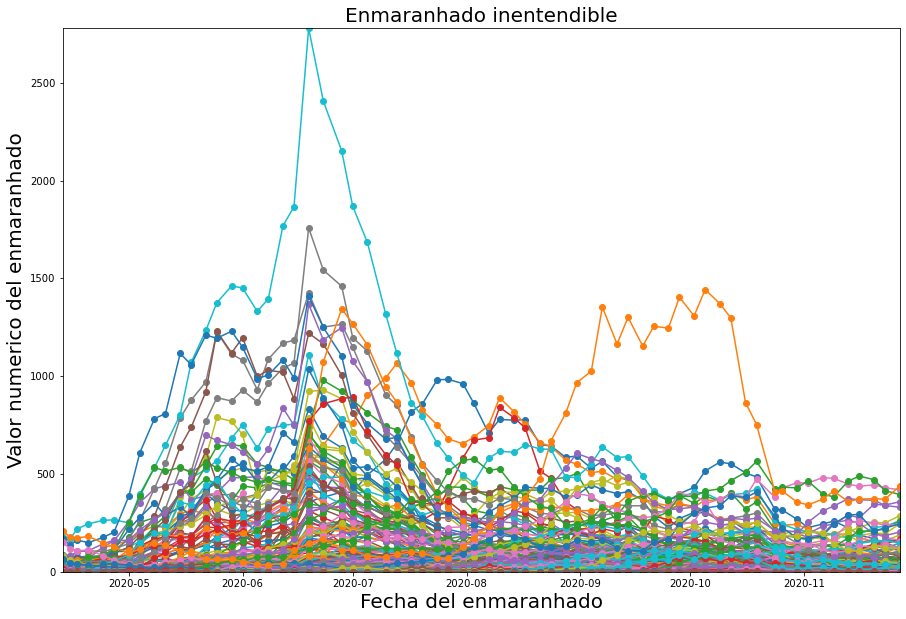

In [46]:
comunas=list(activos["comuna"].unique())
plt.figure(figsize=(15, 10))
plt.margins(0, 0)
for i in comunas:
    partial_dt=activos.query('comuna=='+'"'+i+'"').sort_values(by="fecha", ascending=True)
    plt.plot(partial_dt["fecha"], partial_dt["casos_activos"], marker="o")
plt.title("Enmaranhado inentendible", fontsize=20)
plt.ylabel("Valor numerico del enmaranhado", fontsize=20)
plt.xlabel("Fecha del enmaranhado", fontsize=20)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

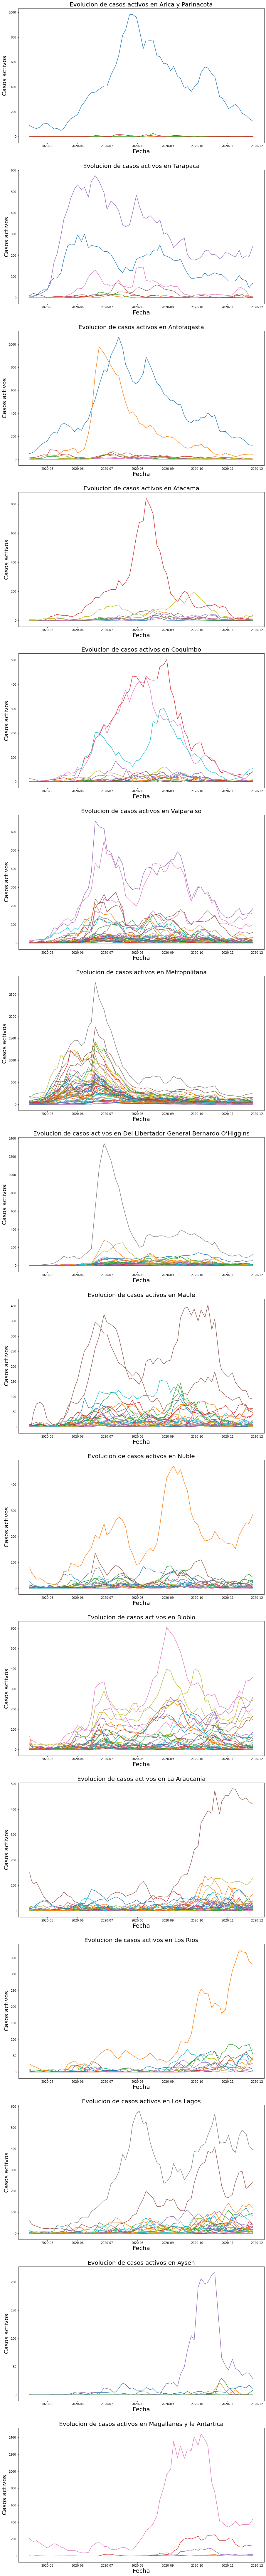

In [42]:
regiones=activos["region"].unique()

fig, axes=plt.subplots(len(regiones), 1, figsize=(15, 10*len(regiones)))

for i in range(len(regiones)):
    partial_dt=activos.query('region=='+'"'+regiones[i]+'"')
    for j in partial_dt["comuna"].unique():
        partial_dt_2_electric_boogaloo=partial_dt.query('comuna=='+'"'+j+'"').sort_values(by="fecha", ascending=True)
        axes[i].plot(partial_dt_2_electric_boogaloo["fecha"], partial_dt_2_electric_boogaloo["casos_activos"])
        axes[i].set_title("Evolucion de casos activos en "+regiones[i], fontsize=20)
        axes[i].set_ylabel("Casos activos", fontsize=20)
        axes[i].set_xlabel("Fecha", fontsize=20)
        
plt.show()

**Comentarios:** El primer grafico es un enmaranhado indistinguible. Dividir las comunas por region nos facilito la comprension, y se pueden apreciar algunas conclusiones utiles; por ejemplo, en algunas regiones como la metropolitana y la de valparaiso, se aprecian curvas con la misma forma; esto porbablemente se pueda deber a comunas que estan en conurbaciones (como santiago, o Vinha y Valparaiso), que probablemente se comporten de la misma forma respecto a contagions independientemente que hayan habido impedimentos en el traslado fisico de un lugar a otro.

## Ejercicio 8

(10 puntos)

Hacer un gráfico que permita comparar rápidamente entre regiones su promedio de casos activos , máximo de casos confirmados y fallecidos. Utiliza los valores reales y apoyarlos con colores.

Se adjunta el diccionario `region_names` con tal de reemplazar los nombres de las regiones en los datos `fallecidos` para poder unir con los otros datos. 

In [18]:
region_names = {
    "Araucanía": "La Araucanía",
    "Aysén": "Aysén del General Carlos Ibáñez del Campo",
    "Magallanes": "Magallanes y de la Antártica Chilena",
    "Metropolitana": "Metropolitana de Santiago",
    "O’Higgins": "Libertador General Bernardo O'Higgins",
}

In [19]:
fallecidos_mod=fallecidos.copy()
fallecidos_mod["region"]=np.array(list(map((lambda x: region_names[x] if x in region_names else x), fallecidos_mod["region"].values)))

confirmados_mod=confirmados[["region", "fecha", "region_id", "poblacion", "tasa", "casos_confirmados"]].copy()
confirmados_mod["region_id"]=np.array(list(map(lambda x: int(x), confirmados_mod["region_id"].values)))
confirmados_mod=confirmados_mod.groupby(by=["region", "fecha", "region_id"], as_index=False).sum()

confirmados_mod["tasa"]=confirmados_mod["casos_confirmados"].values/confirmados_mod["poblacion"].values*100000

activos_mod=activos.rename(columns = {"codigo_region": "region_id"})
activos_mod=activos_mod.groupby(by=["fecha", "region", "region_id"], as_index=False).sum()

one_to_rule_them_all=fallecidos_mod.merge(confirmados_mod, how="inner", on=["fecha", "region"]).merge(activos_mod[["fecha", "region_id", "casos_activos"]], how="inner", on=["fecha", "region_id"])

display(confirmados_mod.query("region_id==15 and fecha=='2020-04-13'"))
display(fallecidos_mod[:1])
display(activos_mod.query("region_id==15 and fecha=='2020-04-13'"))
display(one_to_rule_them_all[:1])

,region,fecha,region_id,poblacion,tasa,casos_confirmados
66,Arica y Parinacota,2020-04-13,15,252110.0,45.615009,115.0


,region,fecha,fallecidos
374,Arica y Parinacota,2020-04-13,1.0


,fecha,region,region_id,codigo_comuna,poblacion,casos_activos
1,2020-04-13,Arica y Parinacota,15,60606.0,252110.0,88.0


,region,fecha,fallecidos,region_id,poblacion,tasa,casos_confirmados,casos_activos
0,Arica y Parinacota,2020-04-13,1.0,15,252110.0,45.615009,115.0,88.0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

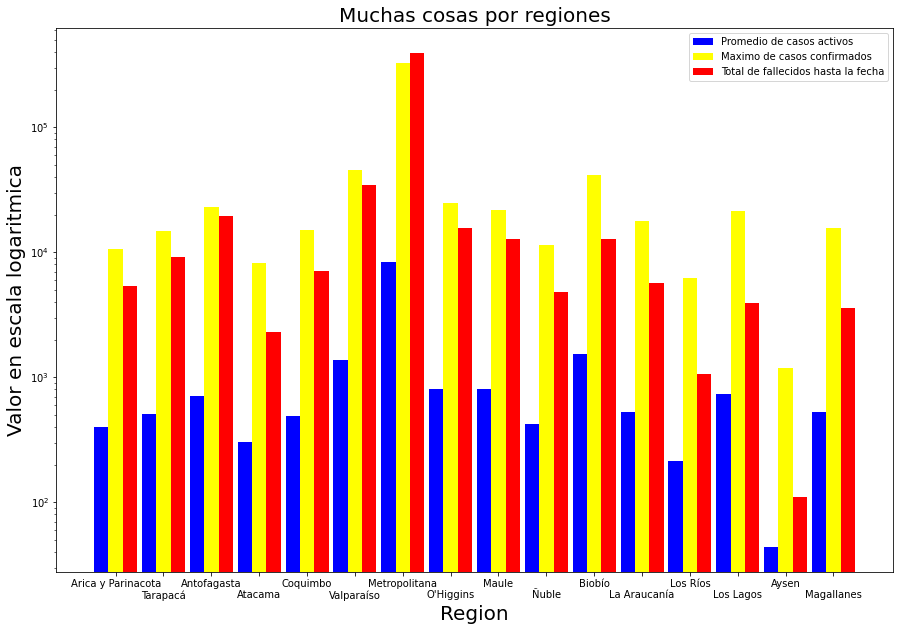

In [41]:
fig, ax=plt.subplots(1, 1, figsize=(15, 10))

regiones=one_to_rule_them_all["region"].unique()

xlabels=list()
dc={"Metropolitana de Santiago":"Metropolitana", "Libertador General Bernardo O'Higgins":"O'Higgins", "Aysén del General Carlos Ibáñez del Campo":"Aysen", "Magallanes y de la Antártica Chilena":"Magallanes"}
f=lambda x: dc[x] if x in dc else x
i=0

for j in regiones:
    if i:
        xlabels.append("\n"+f(j))
        i=0
    else:
        xlabels.append(f(j))
        i=1
del f

partial_dt=one_to_rule_them_all.groupby(by="region").mean()
plt.yscale("log")
for i in range(len(regiones)):
    r1=ax.bar([i], partial_dt["casos_activos"][regiones[i]], color="blue", width=0.3)
    
partial_dt=one_to_rule_them_all.groupby(by="region").max()
for i in range(len(regiones)):
    r2=ax.bar([i+0.3], partial_dt["casos_confirmados"][regiones[i]], color="yellow", width=0.3)

partial_dt=one_to_rule_them_all.groupby(by="region").sum()
for i in range(len(regiones)):
    r3=ax.bar([i+0.6], partial_dt["fallecidos"][regiones[i]], color="red", width=0.3)
    
ax.set_xticks(np.array(range(len(regiones)))+0.3)
ax.set_xticklabels(xlabels)

ax.set_title("Muchas cosas por regiones", fontsize=20)
ax.set_ylabel("Valor en escala logaritmica", fontsize=20)
ax.set_xlabel("Region", fontsize=20)

plt.legend((r1[0], r2[0], r3[0]), ("Promedio de casos activos", "Maximo de casos confirmados", "Total de fallecidos hasta la fecha"))

plt.show()

#Los colores sansanos han sido una mera coincidencia; el color verde era demaciado alegre y positivo para describir el promedio de casos activos.

**Comentarios:** Me fue imposible realizar los 3 valores en un grafico lineal y que fueran comparables entre si, por lo que ha sido necesario realizarlos en valores logaritmicos para preservar los valores reales. Fuera eso, se aprecian diferencias significativas bastante bien.

## Ejercicio 9


En este ejercicio buscaremos realizar un mini-dashboard respecto al estado de los casos de COVID-19 en Chile, por lo tanto haremos uso de datos geográficos de manera operacional (es decir, no nos preocuparemos de proyecciones en mapas ni nada por el estilo), lo único es que debes instalar `geopandas` en tu ambiente virtual y no olvidar actualizarlo en tu `environment.yml` para luego subirlo a tu repositorio de GitHub.

Con tu ambiente activo (`conda activate mat281`) basta con ejecutar `conda install -c conda-forge geopandas` para instalar `geopandas`.

In [21]:
import geopandas as gpd
from pathlib import Path

In [22]:
shp_filepath = Path().resolve().parent / "data" / "regiones_chile.shp"
regiones = gpd.read_file(shp_filepath)
regiones.head()

,Region,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,geometry
0,Región Metropolitana de Santiago,1092,7,13,15392.030737,2.225204e+10,1.064253e+06,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
1,Región de Antofagasta,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
2,Región de Arica y Parinacota,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
3,Región de Atacama,1089,4,3,75661.248635,9.643906e+10,2.401741e+06,"MULTIPOLYGON (((-7900342.628 -3153340.296, -79..."
4,Región de Aysén del Gral.Ibañez del Campo,1088,14,11,106703.377369,2.242743e+11,4.144481e+07,"MULTIPOLYGON (((-8208500.834 -5733817.475, -82..."


In [23]:
type(regiones)

geopandas.geodataframe.GeoDataFrame

Lo único que tienes que saber es que un `GeoDataFrame` es idéntico a un `DataFrame` salvo que debe poseer una columna llamada `geometry` caracterice los elementros geométricos, que en este casos son polígonos con los límites de las regiones de Chile. 

Para graficar mapas en Altair se debe usar `mark_geoshape`, además, para no preocuparnos de las proyecciones si o si debes declarar lo siguiente que se muestra en la siguiente celda en las propiedades del gráfico. El resto es igual a cualquier otro gráfico de Altair.

In [24]:
alt.Chart(regiones).mark_geoshape().encode(
).properties(
    projection={'type': 'identity', 'reflectY': True},
    width=250,
    height=600
)

alt.Chart(...)

### Ejercicio 9.1

(10 puntos)

Define el `DataFrame` con el nombre `casos_geo` tal que tenga las columnas

* `region`
* `codigo_region`
* `fecha`
* `poblacion`
* `casos_confirmados`
* `tasa`
* `casos_activos`
* `fallecidos`
* `geometry`

Ten mucho cuidado como unes los dataframes `confirmados`, `activos`, `fallecidos` y `regiones`. Idealmente utilizar el código de región, pero en caso que no se encuentren disponibles utilizar el nombre de la región (no olivdar utilizar el diccionario `region_names`).

In [25]:
#NOOOOO me reservaron regiones :(
regiones_mod=regiones.rename(columns={"codregion":"region_id"})[["region_id", "geometry"]].copy()
display(regiones_mod)

,region_id,geometry
0,13,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
1,2,"MULTIPOLYGON (((-7874671.129 -2977676.850, -78..."
2,15,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
3,3,"MULTIPOLYGON (((-7900342.628 -3153340.296, -79..."
4,11,"MULTIPOLYGON (((-8208500.834 -5733817.475, -82..."
5,4,"MULTIPOLYGON (((-7977004.630 -3643350.078, -79..."
6,9,"POLYGON ((-8101075.126 -4521676.016, -8101101...."
7,10,"MULTIPOLYGON (((-8224346.368 -5128442.053, -82..."
8,14,"MULTIPOLYGON (((-8160194.639 -4859056.006, -81..."
9,12,"MULTIPOLYGON (((-8024802.991 -7248340.305, -80..."


In [26]:
casos_geo = (
    one_to_rule_them_all.merge(regiones_mod, on="region_id", how="inner")
)

casos_geo.head()

,region,fecha,fallecidos,region_id,poblacion,tasa,casos_confirmados,casos_activos,geometry
0,Arica y Parinacota,2020-04-13,1.0,15,252110.0,45.615009,115.0,88.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
1,Arica y Parinacota,2020-04-15,1.0,15,252110.0,49.184880,124.0,80.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
2,Arica y Parinacota,2020-04-17,2.0,15,252110.0,53.151402,134.0,72.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
3,Arica y Parinacota,2020-04-20,2.0,15,252110.0,65.844274,166.0,65.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
4,Arica y Parinacota,2020-04-24,3.0,15,252110.0,88.850105,224.0,77.0,"POLYGON ((-7727277.278 -1997230.768, -7726464...."


Ejecuta lo siguiente para convertir el DataFrame anterior en un GeoDataFrames

In [27]:
casos_geo = casos_geo.pipe(lambda x: gpd.GeoDataFrame(x, geometry="geometry"))

### Ejercicio 9.2

(5 puntos)

Modifica la función `covid_chile_chart` tal que reciba una fecha y una columna. Luego, debe filtrar `casos_geo` con registros de la fecha seleccionada y graficar un mapa donde las regiones se colereen según la columna escogida. 

In [37]:
#Altair no funciona; ocupando el equivalente en matplorlib. Implementando descartes para tales fines.
#def covid_chile_chart(fecha, col):
def covid_chile_chart(fecha, col):
    
    fecha = pd.to_datetime(fecha)
    data = casos_geo.query("fecha=="+"'"+str(fecha)+"'")
    
    '''chart = alt.Chart(data).mark_geoshape().encode(
        x="region",
        y=col
    ).properties(
        projection={'type': 'identity', 'reflectY': True},
        width=150,
        height=400
    )
    
    chart.display()'''
    fig, ax=plt.subplots(1, 1, figsize=(15, 10))
    ax.set_title(col+" por regiones" )
    data.plot(column="tasa", ax=ax, legend=True)
    data.show()
    [l.remove for i in ax.lines]
    return

Prueba con lo siguiente

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

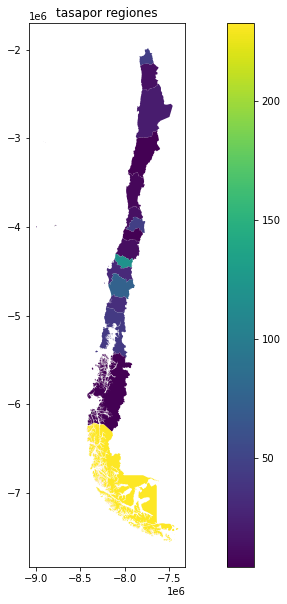

In [38]:
fecha = "2020-04-13"
col = "tasa"
covid_chile_chart(fecha, col)

### Ejercicio 9.3

(5 puntos)

Ahora utilizando `widgets` generaremos el dashboard interactivo. Define lo siguiente:

* col_widget: Un `widgets.Dropdown` donde las opciones a seleccionar sean las columnas `poblacion`, `casos_confirmados`, `tasa`, `casos_activos` y `fallecidos`. Además, el argumento `description` debe ser `Columna`.
* fecha_widget: Un `widgets.DatePicker` donde el argumento `description` sea `Fecha`.
* Ambos widgets deben tener el argumento `continuous_update=False`

In [30]:
import ipywidgets as widgets
from ipywidgets import interactive, interact
import IPython.display as dsp

In [31]:
col_widget = widgets.Dropdown(options=["poblacion", "casos_confirmados", "tasa", "casos_activos", "fallecidos"], value="poblacion", description="Columna", continuous_update=False)

poblacion


<function __main__.<lambda>(x)>

In [32]:
fecha_widget = widgets.DatePicker(description="Fecha", value=pd.to_datetime("2020-04-13"), continuous_update=False)

Finalmente, haciendo uso de `interactive`, la función `covid_chile_chart` y todos los widgets es posible crear un _dashboard_ interactivo con los datos de Covid-19.

Respira profundo y explora tu creación!

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

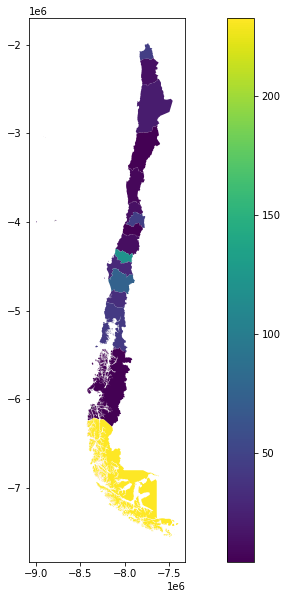

In [35]:
#covid_dashboard = interactive(
    #covid_chile_chart,
    #fecha=fecha_widget,
    #col=col_widget
#)
covid_dashboard=interactive(covid_chile_chart, fecha=fecha_widget, col=col_widget)
dsp.display(covid_dashboard)

**Comentarios:** RESPONDE AQUÍ

In [60]:
#IPYwidgets simplemente no funcionan. Se intento? Si.
#Se pudo? No. 
#Tal vez mas suerte con binder. Hay tantas cosas que actualizar en evironmente.yml que ni es chistoso.
#He de notar que los graficos en matplot lib, sin embargo, son bastante bonitos y faciles de hacer, ademas de rapidos.